# Quantitative Image Processing

In [93]:
import numpy as np # For numerics
import glob # For parsing durectories and files
import skimage.io # For basic image processing
import pandas as pd # For data handling
import skimage.filters # For filtering images
import skimage.exposure
import skimage.measure
import seaborn as sns # For plot swag
import matplotlib.pyplot as plt # For plotting
sns.set(style="darkgrid") # Gray background with white grid
sns.set_context('talk') # Sets default size to the curves and fonts
#display plots next to code
%matplotlib inline 

### Loading images into memory

In [88]:
# List files
phase_files = glob.glob('../data/ecoli_images/*phase*')
yfp_files = glob.glob('../data/ecoli_images/*yfp*')


### Loading file to memory

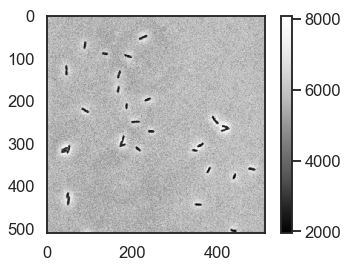

In [30]:
phase_im = skimage.io.imread(phase_files[0])

with sns.axes_style('white'):
    # Plot the image in Gray Scale
    plt.imshow(phase_im, cmap=plt.cm.Greys_r)
    
    # Add color bar
    plt.colorbar()

### Plot the histogram of intensites to choose the threshold value

Text(0, 0.5, 'count')

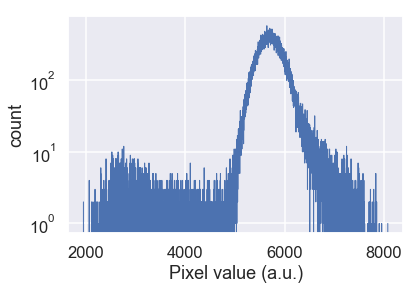

In [31]:
# Generate histogram
hist, bins = skimage.exposure.histogram(phase_im)

# Plot histogram
plt.plot(bins, hist, lw=1)
plt.yscale('log')
# Label axis
plt.xlabel('Pixel value (a.u.)')
plt.ylabel('count')

### Let's choose a threshold and plot the segmented image

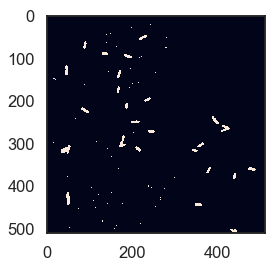

In [32]:
# Define threshold
thresh = 5000

# Threshold image
im_thresh = phase_im < thresh

# Plot the threshold image
with sns.axes_style('white'):
    plt.imshow(im_thresh)

### Let's apply the threshold to the second image in the stack

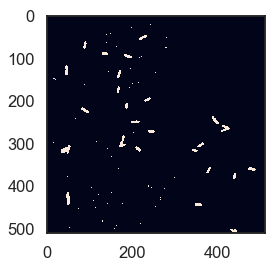

In [64]:
# Read the second image
phase_im_2 = skimage.io.imread(phase_files[-2])

# Threshold image
im_thresh_2 = phase_im_2 < thresh

# Plot the threshold imagemm
with sns.axes_style('white'):
    plt.imshow(im_thresh_2)

### Let's plot the intensities of both the images together

Text(0, 0.5, 'count')

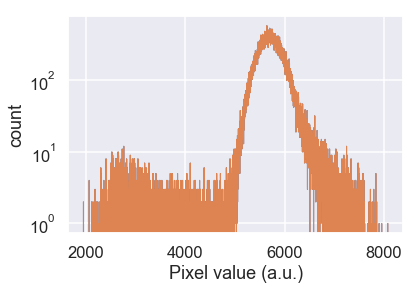

In [65]:
# Generate histogram for file 1
hist, bins = skimage.exposure.histogram(phase_im)

# Plot histogram for file 2
plt.plot(bins, hist, lw=1)


# Generate histogram
hist, bins = skimage.exposure.histogram(phase_im_2)

# Plot histogram
plt.plot(bins, hist, lw=1)

plt.yscale('log')
# Label axis
plt.xlabel('Pixel value (a.u.)')
plt.ylabel('count')

### Define a function to normalise image to values between 0 and 1

In [66]:
def normalise_im(im):
    '''
    Normalise a given image such that the values (of pixels) range between 0 and 1.
    
    Parameters
    ----------
    im : 2d-array
        Image to be normalised
        
    Returns
    -------
    im_norm : 2d-array
            Normlised image ranging from 0 to 1.
    '''
    # Normalise image
    im_norm = (im - im.min()) / (im.max() - im.min())
    
    return im_norm

### Normalise both phase contrast images and display the normalised intensity histogram

Text(0, 0.5, 'count')

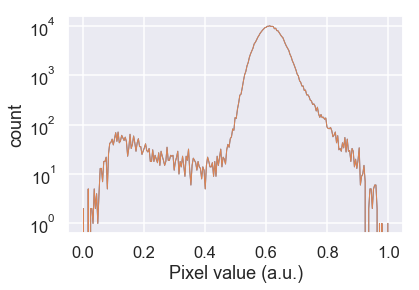

In [67]:
# Normalising images
phase_norm_1 = normalise_im(phase_im)
phase_norm_2 = normalise_im(phase_im_2)

# Generate normalised histogram for file 1
hist, bins = skimage.exposure.histogram(phase_norm_1)

# Plot normalised histogram for file 2
plt.plot(bins, hist, lw=1)


# Generate histogram
hist, bins = skimage.exposure.histogram(phase_norm_2)

# Plot histogram
plt.plot(bins, hist, lw=1)

plt.yscale('log')
# Label axis
plt.xlabel('Pixel value (a.u.)')
plt.ylabel('count')

### Choosing the normalised threshold and plotting them next to each other

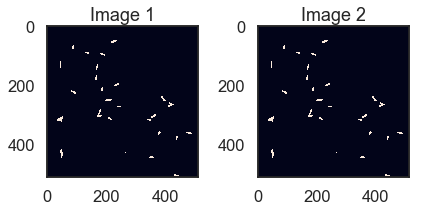

In [68]:
# Choosing the normalised threshold
thresh_norm = 0.45

# Threshold images
thresh_im_1 = phase_norm_1 < thresh_norm
thresh_im_2 = phase_norm_2 < thresh_norm

with sns.axes_style('white'):
    # Inititalise subplots
    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    # Plot the first image
    ax[0].imshow(thresh_im_1)
    ax[0].set_title('Image 1')
    
    # Plot the second image
    ax[1].imshow(thresh_im_2)
    ax[1].set_title('Image 2')
    
    # Distribute subplots
    plt.tight_layout()

### Build an "RGB" image to display the segmentation mask on top of the phase contrast image

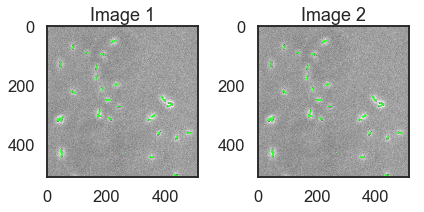

In [69]:
# Copy image
phase_copy_1 = np.copy(phase_norm_1)
phase_copy_2 = np.copy(phase_norm_2)

# Set pixels in segmentation mask to one in one of the channels
phase_copy_1[thresh_im_1] = 1
phase_copy_2[thresh_im_2] = 1

# Stack images to genarate RGB
rgb_image_1 = np.dstack([phase_norm_1, phase_copy_1, phase_norm_1])
rgb_image_2 = np.dstack([phase_norm_2, phase_copy_2, phase_norm_2])

# Plot the threshold image
with sns.axes_style('white'):
    # Inititalise subplots
    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    # Plot the first image
    ax[0].imshow(rgb_image_1)
    ax[0].set_title('Image 1')
    
    # Plot the second image
    ax[1].imshow(rgb_image_2)
    ax[1].set_title('Image 2')
    
    # Distribute subplots
    plt.tight_layout()

### Label the objects

In [70]:
# Label each individual cell
im_label, num_obj = skimage.measure.label(thresh_im_1, return_num=True)

print('This image has {:d} objects'.format(num_obj))

This image has 27 objects


### Let's take a look at the labelled image

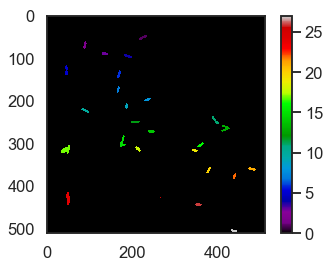

In [71]:
with sns.axes_style('white'):
    # Plot the image in Gray Scale
    plt.imshow(im_label, cmap=plt.cm.nipy_spectral)
    
    # Add color bar
    plt.colorbar()
    

### Let's plot a couple of individual objects

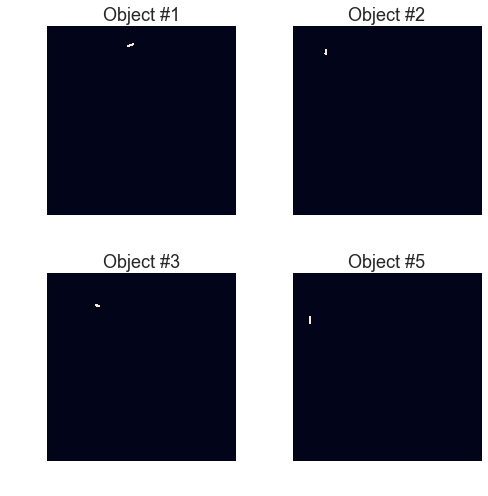

In [72]:
# Define objects to extract
objects = [1, 2, 3, 5]

with sns.axes_style('white'):
    # Inititalise subplots
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
    
    # Linearise our 2D array
    ax = ax.ravel()
    
    # Loop through objects to extract
    for i, num in enumerate(objects):
        # Generate image with only the desired object
        im_obj = im_label == num
        
        # Plot image in corresponding panel
        ax[i].imshow(im_obj)
        ax[i].set_title('Object #{:d}'.format(num))
        
        # Remove axis
        ax[i].axis('off')
    
    # Distribute subplots
    plt.tight_layout()
    
    
    

### Select objects that satisfy our size criteria

This image has 21 objects


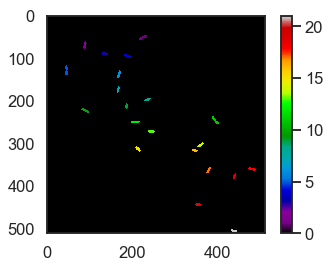

In [73]:
# Define inter-pixel distance
ip_dist = 0.160 # µm

# Set lower and upper bounds
bounds = [1, 4] # µm

# Initialise the black image that satisfy the criterion
im_label_filt = np.zeros_like(im_label)

# Loop through objects in im_labe and decide wether or not to keep them
for i in range(1, num_obj + 1):
    # 1. Extract object
    im_obj = im_label == i
    
    # 2. Find the area of the object
    area_pixels = np.sum(im_obj)
    
    # 3. Convert area to µm^2
    area_um = area_pixels * ip_dist**2
    
    # 4. Check if it satisfies the size criteria
    if (area_um >= bounds[0] and area_um <= bounds[1]):
        # Add object to black image
        im_label_filt += im_obj
        
# Relabel filtered image
im_cells, num_obj = skimage.measure.label(im_label_filt, return_num=True)

print('This image has {:d} objects'.format(num_obj))

# Plot the relabelled objects
with sns.axes_style('white'):
    # Plot the image in Gray Scale
    plt.imshow(im_cells, cmap=plt.cm.nipy_spectral)
    
    # Add color bar
    plt.colorbar()

### Now, Let's calculate the intensities

Text(0, 0.5, 'Intensity')

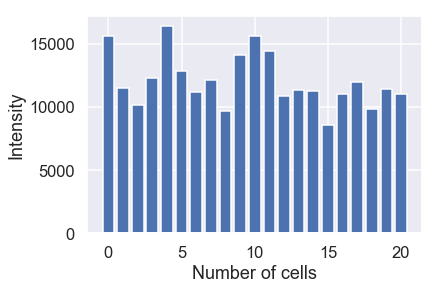

In [91]:
# Read YFP image
im_fluor_1 = skimage.io.imread(yfp_files[0])

# Initialising the array to store the intensities
intensities = np.zeros(num_obj)

# Looping through each cell
for i in range(1, num_obj + 1):
    # Choosing the cell
    im_cell = im_cells == i
    
    # Multipling the extracted cell with its corresponding fluroscent images
    intensities[i-1] = np.sum(im_cell * im_fluor_1)
    
# Generate histogram
y_ax = np.arange(num_obj)
plt.bar(y_ax,intensities)

# Label axis
plt.xlabel('Number of cells')
plt.ylabel('Intensity')

## Time to compare theory and experiment

In [142]:
# List all files
files = glob.glob('../data/lacI_titration/*.tif')

# List the features to be saved in the dataframe
names = ['operator', 'repressors', 'channel', 'position', 'file']

# Initialise an empty pandas dataframe
df_files = pd.DataFrame(columns=names)
# Loop through files
for file in files:
    # Extract info from filename
    # 1. Remove path from file
    f = file.split('/')[-1]

    # 2. Split string by '_'
    f_split = list(f.split('_'))

    # 3. Remove unnessecary elements
    f_split.remove('pos')

    # 4. Add file name
    f_split.append(file)

    # Add this to the dataframe
    series = pd.Series(f_split, index=names)
    df_files = df_files.append(series, ignore_index=True)

### Let's define a function that does the segmentation

In [177]:
def segmentation(file, threshold=0.45, ip_dist=0.160, bounds=(1, 4)):
    '''
    Segment image by thresholding.
    
    Parameters
    ----------
    file : String
        String that points to the phase contrast image
    threshold : float [0, 1]. Default = 0.45
        Threshold value for the segmentation
    ip_dist : float. Default = 0.160 (µm)
        Inter-pixel distance
    bounds : array
        Lower and upper bound for size
        NOTE: This must be in the same units as ip_dist
    
    Return
    ------
    imlabel : 2D-Array
        Segmentation mask
    '''
    
    # 1. Read image
    im = skimage.io.imread(file)
    
    # 2. Normalise the image
    im_norm = normalise_im(im)
    
    # 3. Threshold the image
    im_thresh = im_norm < threshold
    
    #4. Label the image
    im_label, num_obj = skimage.measure.label(im_thresh, return_num=True)
    
    # 5. Filter by size
    # 5.1 Initialise the black image
    im_filt = np.zeros_like(im_label)
    # 5.2 Loop through objects
    for i in range(1,num_obj+1):
        # 5.3 Extract objects
        im_obj = im_label == i
        
        # 5.4 Get area of the cell
        area_cell = np.sum(im_obj) * ip_dist**2
        
        # 5.5 Decide if you want to keep it
        if ((area_cell >= bounds[0]) and (area_cell <= bounds[1])):
            im_filt += im_obj
    
    # 6. Relable image
    im_relabel = skimage.measure.label(im_filt)
    
    return im_relabel

### Let's run our segmentation file

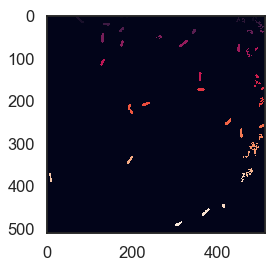

In [178]:
file = df_files[df_files.channel == 'phase']['file'].values[0]

# Test function
im_label = segmentation(file)

with sns.axes_style('white'):
    plt.imshow(im_label)

### Define function to extract single cell flurescence values

In [179]:
def fluor_extract(im_label, im_fluor):
    '''
    Extracts single cell flurescence informatin given a labelled image and an intensity image
    
    Parameters
    ----------
    im_label : 2D-Array
        Labelled segmentation mask
    im_fluor : 2D-Array
        Intensity image
        
    Returns
    -------
    intensities : array
        Fluroscence intensities of each labelled object
    '''
    # 1. Find number of labelled objects
    num_obj = im_label.max()
    
    # 2. Initialise array to save intensities
    intensities = np.zeros(num_obj)
    # 3. Loop through objects and extract
    for i in range(1, num_obj + 1):
        # 3.1 Extract the object
        im_obj = im_label == i
        
        # 3.2 Multiply by YFP image
        im_int = im_obj * im_fluor
        
        # 3.3 Add pixels and register values
        intensities[i - 1] = np.sum(im_int)
        
    return intensities

### Let's compute

In [182]:
# Group dataframe by operator, repressor and position
df_group = df_files.groupby(['operator', 'repressors', 'position'])

# Define coloumn names for intensity dataframe
names = ['operator', 'repressor', 'position', 'mean_int']

# Initialise new array to save mean intensities
df_int = pd.DataFrame(columns=names)

# Loop through each group
for group, data in df_group:
    # Get file name of the phase contrast image
    file_phase = data[data.channel == 'phase']['file'].values[0]
    file_yfp = data[data.channel == 'yfp']['file'].values[0]
    # Segment phase contrast image
    im_label = segmentation(file_phase)
    
    # Read YFP image
    im_fluor = skimage.io.imread(file_yfp)
    
    # Extract intensities
    intensities = fluor_extract(im_label, im_fluor)
    
    # Compute mean intensities
    mean_int = np.mean(intensities)
    
    # Append values to dataframe
    series = pd.Series(group + tuple([mean_int]),
                      index=names)
    df_int = df_int.append(series, ignore_index=True)

/Users/rudradevmandal/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/rudradevmandal/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Let's compute the fold change

In [191]:
# Initialise array to save fold-change
fold_change = np.zeros(len(df_int))

# Loop through each entry in the data frame
for i, row in df_int.iterrows():
    # Extract operator
    op = row.operator
    
    # Extract autoflurescence data
    df_auto = df_int[(df_int.operator == op) &
                    (df_int.repressor == 'auto')]
    # Compute mean autoflurescence
    mean_auto = df_auto.mean_int.mean()
    
    # Extract delta data
    df_delta = df_int[(df_int.operator == op) &
                    (df_int.repressor == 'delta')]
    # Compute mean delta
    mean_delta = df_delta.mean_int.mean()
    
    # Compute fold-change
    fold_change[i] = (row.mean_int - mean_auto) / (mean_delta - mean_auto)
    
# Attach new coloumn of fold-change to dataframe
df_int['fold_change'] = fold_change

### Let's compare experiment and data

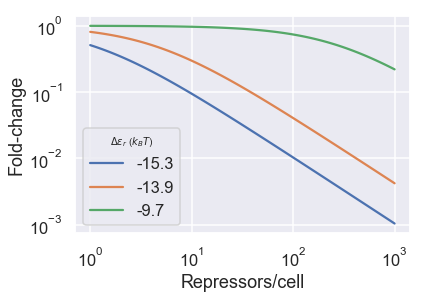

In [206]:
# Define binding energies of binding sites
energies = [-15.3, -13.9, -9.7] # kbT

# Range of repressors to plot
repressors = np.logspace(0, 3, 100)

# Loop through energies and plot fold-change
for energy in energies:
    # Compute fold-change
    fc_theory = 1/(1 + repressors / 4.6E6 * np.exp(- energy))
    
    # Plot fold-change
    plt.plot(repressors, fc_theory, label=str(energy))
    
# Change scale
plt.xscale('log')
plt.yscale('log')

# Label axis
plt.xlabel('Repressors/cell')
plt.ylabel('Fold-change')

# Add legend
plt.legend(title=r'$\Delta\epsilon_r$ ($k_BT$)')

In [214]:
# Define a dictionary to match repressor string to repressor number
rep_dict = {'R124' : 124, 'R22' : 22, 'R60' : 60, 'R260' : 260}

# Define dictionary to map operator to energy
op_dict = {'O1' : -15.3, 'O2' : -13.9, 'O3' : -9.7}

# Define colors for binding sites
colors = sns.color_palette('colorblind',
                          n_colors=len(energies))

# Define a dictionary to match energies with colors
col_dict = dict(zip(energies,colors))

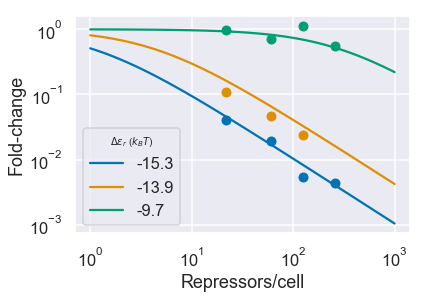

In [231]:
# Remove unnecessary data
df = df_int[(df_int.repressor != 'auto') &
           (df_int.repressor != 'delta')]

# Group by operators and repressors
df_group = df.groupby(['operator', 'repressor'])

# Loop through groups and plot mean fold-change
for group, data in df_group:
    # Extract binding energy
    energy = op_dict[group[0]]
    
    # Extract repressor copy number
    repressor = rep_dict[group[1]]
    
    # Extract the color
    color = col_dict[energy]
    
    # Compute mean fold-change
    mean_fc = data.fold_change.mean()
    
    # Plot data point
    plt.plot(repressor, mean_fc, marker='o',
            color=color)
    
# Loop through energies and plot fold-change
for energy in energies:
    # Compute fold-change
    fc_theory = 1/(1 + repressors / 4.6E6 * np.exp(-energy))
    
    # Plot fold-change
    plt.plot(repressors, fc_theory, label=str(energy), color=col_dict[energy])
    
# Change scale
plt.xscale('log')
plt.yscale('log')

# Label axis
plt.xlabel('Repressors/cell')
plt.ylabel('Fold-change')

# Add legend
plt.legend(title=r'$\Delta\epsilon_r$ ($k_BT$)')